<a href="https://colab.research.google.com/github/VihaanS22/API-/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

media = files.upload()


Saving flowers.csv to flowers.csv


In [ ]:
import pandas as pd
import plotly.express as px

df = pd.read_csv("flowers.csv")

print(df.head())

   petal_size  sepal_size
0   11.323484   13.866161
1    9.265842   13.443414
2   14.329944    7.956200
3   11.883902    7.658534
4    9.957722   12.273535


In [ ]:
fig = px.scatter(df, x = "petal_size", y = "sepal_size")
fig.show()

In [ ]:
from sklearn.cluster import KMeans

X = df.iloc[:,[0,1]].values
print(X)

[[11.32348369 13.86616131]
 [ 9.26584161 13.4434136 ]
 [14.32994392  7.95619956]
 [11.88390198  7.65853411]
 [ 9.95772216 12.27353488]
 [11.87446585 13.23783855]
 [11.05434664  8.34645832]
 [ 9.92501036  9.63140484]
 [ 6.72330556 12.91052608]
 [ 1.7547028   4.92229755]
 [ 2.53760792  2.39274409]
 [ 0.82826409  2.57057886]
 [14.17308088  9.03309242]
 [ 2.8166071   2.21911623]
 [ 8.6152154  12.96116714]
 [12.87654335  8.38760135]
 [14.08781072  6.68177744]
 [ 2.59059319  2.04203334]
 [ 3.32057276  4.34097779]
 [ 3.32553533  2.20737103]
 [10.01773429  9.49527624]
 [ 9.20235232 13.7895536 ]
 [10.47443458 13.03790983]
 [11.45457896  8.76001507]
 [11.03565171  9.70704578]
 [13.46897961  8.43272357]
 [14.40798387  8.68145304]
 [11.49414942 12.35569869]
 [11.88685783  8.13176978]
 [ 8.54247125 13.30436616]
 [13.86822339  9.45088543]
 [10.49468563 12.56398709]
 [10.16523291 13.23462868]
 [12.32039217  9.30666119]
 [ 0.958256    4.44098269]
 [ 9.26893891 13.97415349]
 [ 0.61360663  2.76290393]
 

In [ ]:
wcss = []

for i in range(1, 11):

  k_means = KMeans(n_clusters=i, init = "k-means++", random_state = 4)
  k_means.fit(X)
  wcss.append(k_means.inertia_)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



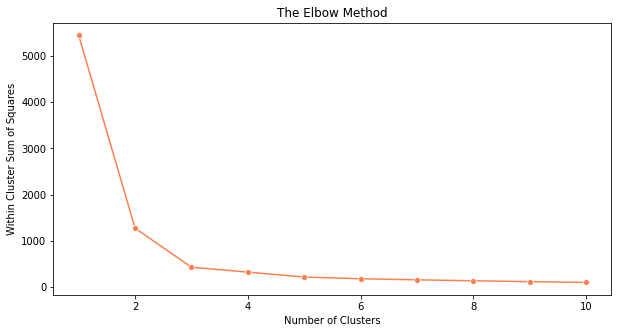

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10, 5))
sns.lineplot(range(1, 11), wcss, marker = "o", color = "coral")

plt.title("The Elbow Method")

plt.xlabel("Number of Clusters")
plt.ylabel("Within Cluster Sum of Squares")

plt.show()

In [ ]:
k_means = KMeans(n_clusters=3, init = "k-means++", random_state = 4)
y_means = k_means.fit_predict(X)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning

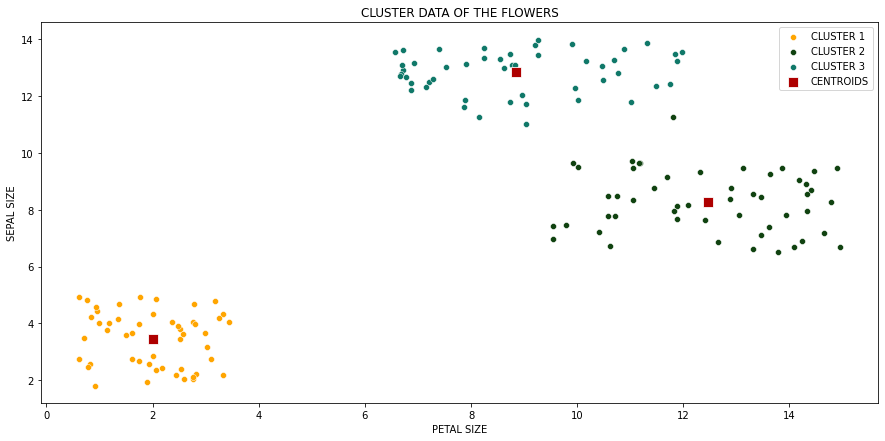

In [ ]:
plt.figure(figsize = (15, 7))
sns.scatterplot(X[y_means == 0, 0], X[y_means == 0, 1], color = "#FFA500", label = "CLUSTER 1")
sns.scatterplot(X[y_means == 1, 0], X[y_means == 1, 1], color = "#104210", label = "CLUSTER 2")
sns.scatterplot(X[y_means == 2, 0], X[y_means == 2, 1], color = "#107869", label = "CLUSTER 3")

sns.scatterplot(k_means.cluster_centers_[:,0], k_means.cluster_centers_[:,1], color = "#AE0000", label = "CENTROIDS", s = 100, marker = ",")

plt.title("CLUSTER DATA OF THE FLOWERS")

plt.xlabel("PETAL SIZE")
plt.ylabel("SEPAL SIZE")

plt.legend()

plt.show()

1. FIND THE EXACT K VALUE (NUMBER OF CLUSTERS).
2. CHOOSING RANDOM CENTROIDS ACCORDING TO K.
3. TO ASSIGN DATA POINTS TO THE NEAREST CENTROID.
4. SHIFT THE CENTROIDS A LITTLE FOR ALL CLUSTERS.
5. REASSIGN DATA POINTS ACCORDING TO NEW CENTROID.

IF ANY DATA POINT GETS REASSIGNED REPEAT STEP 4
ELSE MODEL IS READY.